In [1]:
from montecarlo import MonteCarlo
from CIRModel import BasicCIRModel
from ECIRModel import ECIRModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_data(years):
    z = pd.read_csv('Data Folder/zero_coupon_yields_'+str(years)+'.csv')
    z = z.set_index('DATE')
    z = z.loc['2018-12-15':'2023-12-14']
    return z

z = pd.DataFrame()
years = [1, 2, 3, 5, 7, 10, 20, 30]

for i in years:
    z[i] = read_data(i)
    z[i] = z[i].replace('.', np.nan)
    z[i] = pd.to_numeric(z[i])

z = z.dropna()

In [3]:
def create_model(mod, data):
    models = []
    for i in data:
        models.append(MonteCarlo(mod, data[i][0]/100, int(i), 365*int(i), 100))

    return models

In [4]:
params_ecir = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321,   
    "r": 66,             
    "p": 0.3049          
}

params_cir = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

cir = create_model(BasicCIRModel(**params_cir), z)
ecir = create_model(ECIRModel(**params_ecir), z)

In [5]:
prices_cir = pd.DataFrame()
for model in cir:
    prices_cir[model] = model.price_estimates()[2]

prices_cir.columns = years

In [8]:
prices_ecir = pd.DataFrame()
for model in ecir:
    prices_ecir[model] = model.price_estimates()

prices_ecir.columns = years

In [9]:
prices_ecir

,1,2,3,5,7,10,20,30
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
prices = pd.concat([prices_cir, prices_ecir], axis = 1)
prices = prices.sort_index(axis = 1)
cols = ['1_CIR', '1_ECIR', '2_CIR', '2_ECIR', '3_CIR', '3_ECIR', '5_CIR', '5_ECIR', '7_CIR', '7_ECIR','10_CIR', '10_ECIR', '20_CIR', '20_ECIR', '30_CIR', '30_ECIR']
prices.columns = cols

IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 51

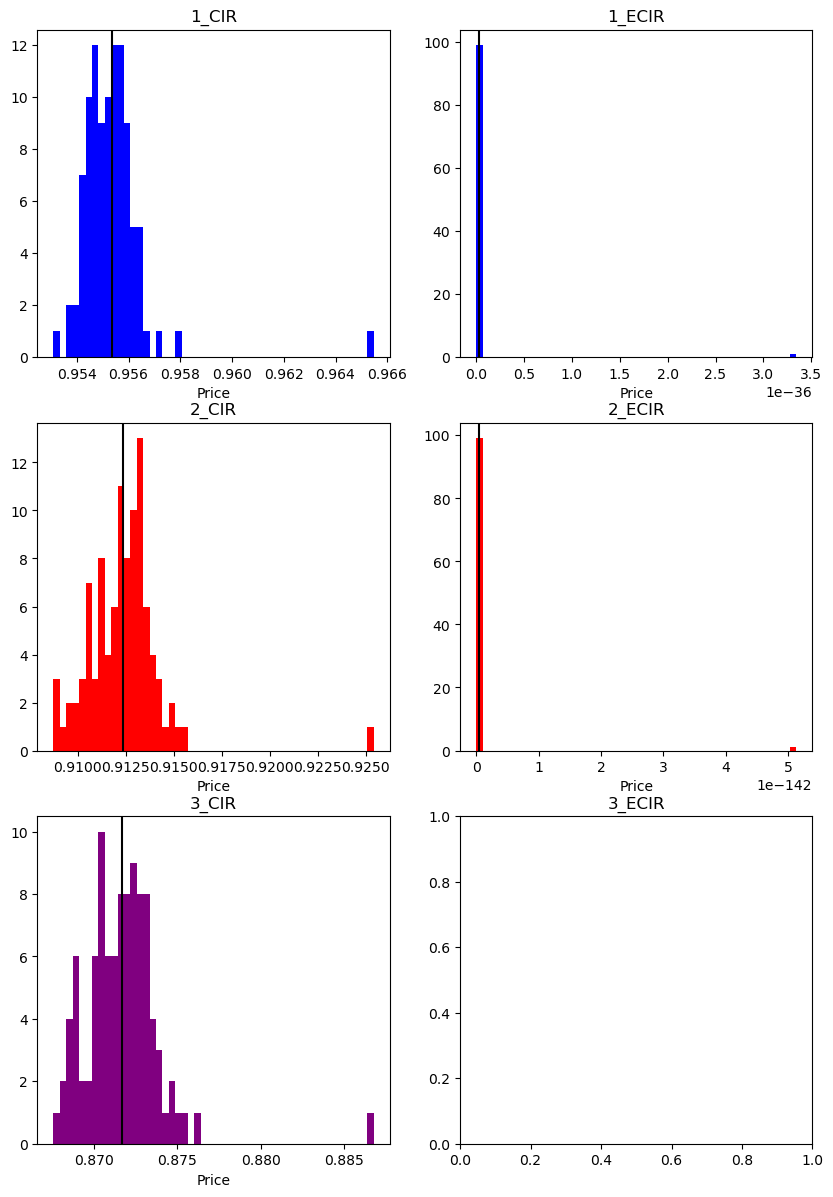

In [16]:
colors = ['blue', 'blue', 'red', 'red', 'purple', 'purple', 'green', 'green']*2

plt.figure(figsize = (10, 40))
for i in range(len(prices.columns)):
    plt.subplot(8, 2, i+1)
    plt.title(prices.columns.to_list()[i])
    plt.hist(prices[cols[i]], color = colors[i], bins = 50)
    plt.xlabel('Price')
    plt.axvline(np.mean(prices[cols[i]]), color = 'black')

In [ ]:
avg_cir = []
err_cir = []
for col in prices_cir:
    avg_cir.append(np.mean(prices_cir[col]))
    err_cir.append(np.std(prices_cir[col]))

avg_ecir = []
err_ecir = []
for col in prices_ecir:
    avg_ecir.append(np.mean(prices_ecir[col]))
    err_ecir.append(np.std(prices_ecir[col]))

In [ ]:
plt.errorbar(years, avg_cir, yerr = err_cir, label = 'CIR', marker = 'o')
plt.errorbar(years, avg_ecir, yerr = err_ecir, label = 'ECIR', marker = 'o')
plt.legend(loc = (0.05, 0.05))
plt.title('Average Price of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price')

In [ ]:
cir_paths = pd.DataFrame()

for i in range(len(cir)):
    cir_paths[years[i]] = cir[i].paths()

In [ ]:
ecir_paths = pd.DataFrame()

for i in range(len(ecir)):
    ecir_paths[years[i]] = ecir[i].paths()

In [ ]:
paths = pd.concat([cir_paths, ecir_paths], axis = 1)
paths = paths.sort_index(axis = 1)
cols = ['1_CIR', '1_ECIR', '2_CIR', '2_ECIR', '3_CIR', '3_ECIR', '5_CIR', '5_ECIR', '7_CIR', '7_ECIR','10_CIR', '10_ECIR', '20_CIR', '20_ECIR', '30_CIR', '30_ECIR']
paths.columns = cols

In [ ]:
plt.figure(figsize = (10, 40))
for i in range(len(cols)):
    plt.subplot(8, 2, i+1)
    plt.title(cols[i])
    for j in range(len(paths[cols[i]])):
        plt.plot(np.arange(0, len(paths[cols[i]][j])), paths[cols[i]][j])

In [ ]:
term = pd.DataFrame()
for i in range(len(cols)):
    term_val = []
    for j in range(len(paths[cols[i]])):
        term_val.append(paths[cols[i]][j][-1])
    term[cols[i]] = term_val

In [ ]:
plt.figure(figsize = (10, 40))
for i in range(len(cols)):
    plt.subplot(8, 2, i+1)
    plt.title(cols[i])
    sns.histplot(term[cols[i]], color = colors[i], bins = 50, kde = True)
    plt.xlabel('Terminal Interest Rate Value')
    plt.axvline(np.mean(term[cols[i]]), color = 'black')

In [ ]:
term_cir = pd.DataFrame()
term_ecir = pd.DataFrame()
for i in range(len(cols)):
    if i%2 == 0:
        term_cir[cols[i]]  = term[cols[i]]
    else:
        term_ecir[cols[i]] = term[cols[i]]

In [ ]:
avg_cir_term = []
err_cir_term = []
for col in term_cir:
    avg_cir_term.append(np.mean(term_cir[col]))
    err_cir_term.append(np.std(term_cir[col]))

avg_ecir_term = []
err_ecir_term = []
for col in term_ecir:
    avg_ecir_term.append(np.mean(term_ecir[col]))
    err_ecir_term.append(np.std(term_ecir[col]))

In [ ]:
plt.errorbar(years, avg_cir_term, yerr = err_cir_term, label = 'CIR', marker = 'o')
plt.errorbar(years, avg_ecir_term, yerr = err_ecir_term, label = 'ECIR', marker = 'o')
plt.legend()
plt.title('Average Terminal Value of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Terminal Value of Interest Rate')